# web scraping

In [482]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")

In [483]:
d= pd.read_csv(r'D:\internfolder\globalpowerplant.csv')
d

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [484]:
d.shape

(908, 25)

In [485]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

<AxesSubplot:>

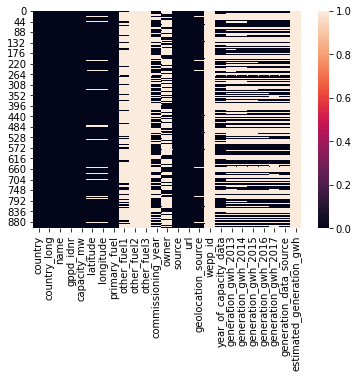

In [486]:
#to observe if any table has missing data or not
sns.heatmap(d.isnull())

In [487]:
d=d.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','generation_data_source'],axis=1)
d

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

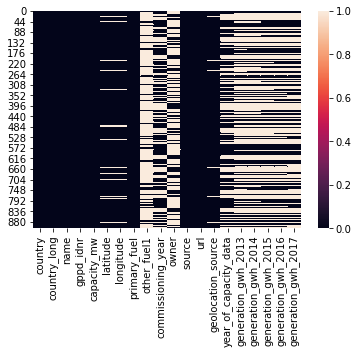

In [488]:
#to observe if any table has missing data or not
sns.heatmap(d.isnull())

In [489]:
d.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [490]:
d=d.drop(['other_fuel1','name','country_long','gppd_idnr','latitude', 'longitude','url','owner','geolocation_source','generation_gwh_2013','generation_gwh_2014'],axis=1)
d

,country,capacity_mw,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,2.5,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,IND,98.0,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN
2,IND,39.2,Wind,NaN,CDM,NaN,NaN,NaN,NaN
3,IND,135.0,Gas,2004.0,Central Electricity Authority,2018.0,843.747000,886.004428,663.774500
4,IND,1800.0,Coal,2015.0,Central Electricity Authority,2018.0,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...
903,IND,1600.0,Coal,2016.0,Central Electricity Authority,2018.0,0.994875,233.596650,865.400000
904,IND,3.0,Solar,NaN,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN
905,IND,25.5,Wind,NaN,CDM,NaN,NaN,NaN,NaN
906,IND,80.0,Coal,NaN,Hindustan Zinc ltd,NaN,NaN,NaN,NaN


<AxesSubplot:>

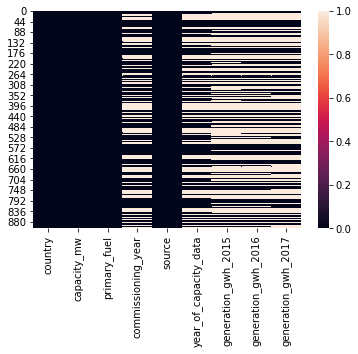

In [491]:
sns.heatmap(d.isnull())

In [492]:
d['commissioning_year']=d['commissioning_year'].fillna(d['commissioning_year'].mean())
d['year_of_capacity_data']=d['year_of_capacity_data'].fillna(d['year_of_capacity_data'].mean())

d['generation_gwh_2015']=d['generation_gwh_2015'].fillna(d['generation_gwh_2015'].mean())
d['generation_gwh_2016']=d['generation_gwh_2016'].fillna(d['generation_gwh_2016'].mean())
d['generation_gwh_2017']=d['generation_gwh_2017'].fillna(d['generation_gwh_2017'].mean())

In [493]:
d.head()

,country,capacity_mw,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,2.5,Solar,2011.000000,National Renewable Energy Laboratory,2018.0,2414.072373,2453.936292,2531.754458
1,IND,98.0,Coal,1996.876894,Ultratech Cement ltd,2018.0,2414.072373,2453.936292,2531.754458
2,IND,39.2,Wind,1996.876894,CDM,2018.0,2414.072373,2453.936292,2531.754458
3,IND,135.0,Gas,2004.000000,Central Electricity Authority,2018.0,843.747000,886.004428,663.774500
4,IND,1800.0,Coal,2015.000000,Central Electricity Authority,2018.0,5916.370000,6243.000000,5385.579736


<AxesSubplot:>

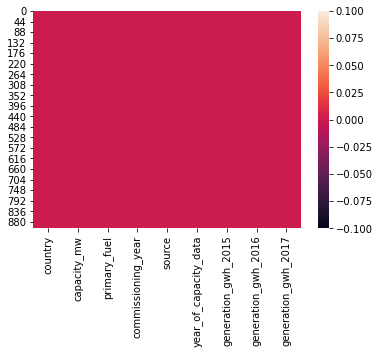

In [494]:
sns.heatmap(d.isnull())

In [495]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                908 non-null    object 
 1   capacity_mw            908 non-null    float64
 2   primary_fuel           908 non-null    object 
 3   commissioning_year     908 non-null    float64
 4   source                 908 non-null    object 
 5   year_of_capacity_data  908 non-null    float64
 6   generation_gwh_2015    908 non-null    float64
 7   generation_gwh_2016    908 non-null    float64
 8   generation_gwh_2017    908 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.0+ KB


In [496]:
d.head()

,country,capacity_mw,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,IND,2.5,Solar,2011.000000,National Renewable Energy Laboratory,2018.0,2414.072373,2453.936292,2531.754458
1,IND,98.0,Coal,1996.876894,Ultratech Cement ltd,2018.0,2414.072373,2453.936292,2531.754458
2,IND,39.2,Wind,1996.876894,CDM,2018.0,2414.072373,2453.936292,2531.754458
3,IND,135.0,Gas,2004.000000,Central Electricity Authority,2018.0,843.747000,886.004428,663.774500
4,IND,1800.0,Coal,2015.000000,Central Electricity Authority,2018.0,5916.370000,6243.000000,5385.579736


In [497]:
d=d.drop(["country",'year_of_capacity_data'],axis=1)
d.head()

,capacity_mw,primary_fuel,commissioning_year,source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,2011.000000,National Renewable Energy Laboratory,2414.072373,2453.936292,2531.754458
1,98.0,Coal,1996.876894,Ultratech Cement ltd,2414.072373,2453.936292,2531.754458
2,39.2,Wind,1996.876894,CDM,2414.072373,2453.936292,2531.754458
3,135.0,Gas,2004.000000,Central Electricity Authority,843.747000,886.004428,663.774500
4,1800.0,Coal,2015.000000,Central Electricity Authority,5916.370000,6243.000000,5385.579736


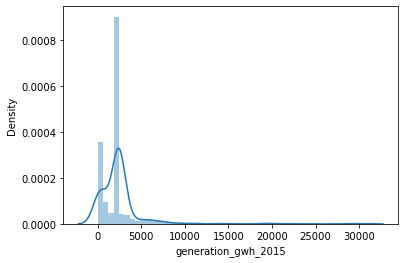

In [498]:
sns.distplot(d["generation_gwh_2015"])
plt.show()

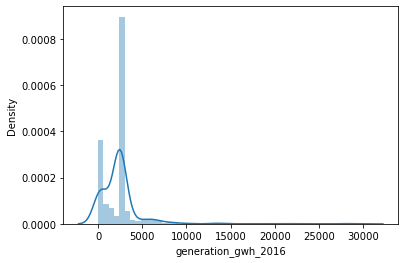

In [499]:
sns.distplot(d["generation_gwh_2016"])
plt.show()

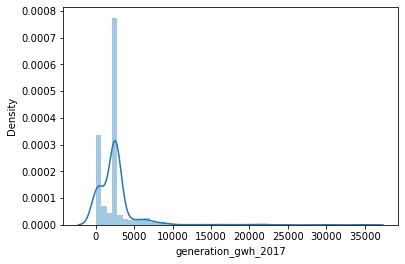

In [500]:
sns.distplot(d["generation_gwh_2017"])
plt.show()

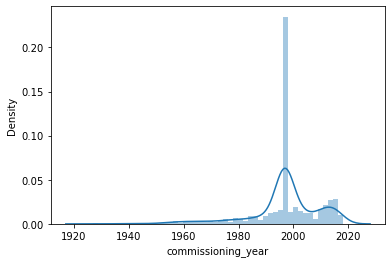

In [501]:
sns.distplot(d["commissioning_year"])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Solar'),
  Text(1, 0, 'Coal'),
  Text(2, 0, 'Wind'),
  Text(3, 0, 'Gas'),
  Text(4, 0, 'Hydro'),
  Text(5, 0, 'Biomass'),
  Text(6, 0, 'Oil'),
  Text(7, 0, 'Nuclear')])

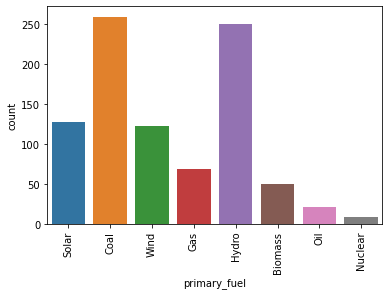

In [502]:
sns.countplot(x='primary_fuel',data=d)

plt.xticks(rotation=90)

# encoding the data

In [503]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [504]:
for i in d.columns:
    if d[i].dtypes=="object":
        d[i]=enc.fit_transform(d[i].values.reshape(-1,1))
d.head()

,capacity_mw,primary_fuel,commissioning_year,source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6.0,2011.000000,109.0,2414.072373,2453.936292,2531.754458
1,98.0,1.0,1996.876894,174.0,2414.072373,2453.936292,2531.754458
2,39.2,7.0,1996.876894,21.0,2414.072373,2453.936292,2531.754458
3,135.0,2.0,2004.000000,22.0,843.747000,886.004428,663.774500
4,1800.0,1.0,2015.000000,22.0,5916.370000,6243.000000,5385.579736


In [505]:
d.describe()

,capacity_mw,primary_fuel,commissioning_year,source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,3.205947,1996.876894,43.823789,2414.072373,2453.936292,2531.754458
std,580.221767,2.281339,12.994825,44.624092,2860.146282,2878.730064,2923.041411
min,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1.000000,1996.876894,22.000000,874.205000,826.629750,852.438887
50%,60.000000,3.000000,1996.876894,22.000000,2414.072373,2453.936292,2531.754458
75%,388.125000,6.000000,2003.000000,29.250000,2414.072373,2453.936292,2531.754458
max,4760.000000,7.000000,2018.000000,190.000000,30539.000000,30015.000000,35116.000000


In [506]:
d.corr()

,capacity_mw,primary_fuel,commissioning_year,source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,-0.377783,0.265827,-2.417009e-01,7.220814e-01,7.528288e-01,7.670398e-01
primary_fuel,-0.377783,1.000000,-0.123060,5.360860e-02,-1.251376e-01,-1.313584e-01,-1.321741e-01
commissioning_year,0.265827,-0.123060,1.000000,2.183213e-02,1.493040e-01,1.726976e-01,1.734004e-01
source,-0.241701,0.053609,0.021832,1.000000e+00,-8.212982e-18,-5.204877e-17,-1.050936e-16
generation_gwh_2015,0.722081,-0.125138,0.149304,-8.212982e-18,1.000000e+00,9.689693e-01,9.284589e-01
generation_gwh_2016,0.752829,-0.131358,0.172698,-5.204877e-17,9.689693e-01,1.000000e+00,9.647861e-01
generation_gwh_2017,0.767040,-0.132174,0.173400,-1.050936e-16,9.284589e-01,9.647861e-01,1.000000e+00


<AxesSubplot:>

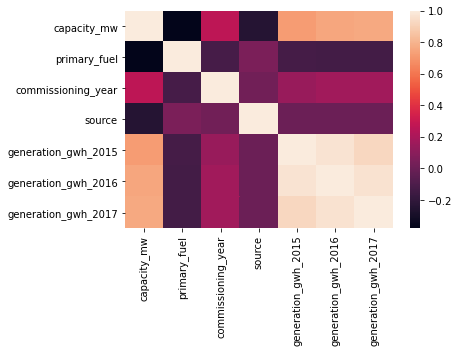

In [507]:
sns.heatmap(d.corr())

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'source'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

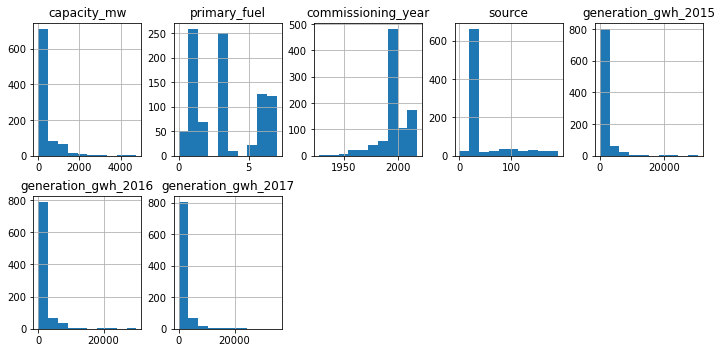

In [508]:
d.hist(figsize=(12,12), layout=(4,5), sharex=False)

# plotting outliers

capacity_mw               AxesSubplot(0.125,0.657941;0.133621x0.222059)
primary_fuel           AxesSubplot(0.285345,0.657941;0.133621x0.222059)
commissioning_year      AxesSubplot(0.44569,0.657941;0.133621x0.222059)
source                 AxesSubplot(0.606034,0.657941;0.133621x0.222059)
generation_gwh_2015    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
generation_gwh_2016       AxesSubplot(0.125,0.391471;0.133621x0.222059)
generation_gwh_2017    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

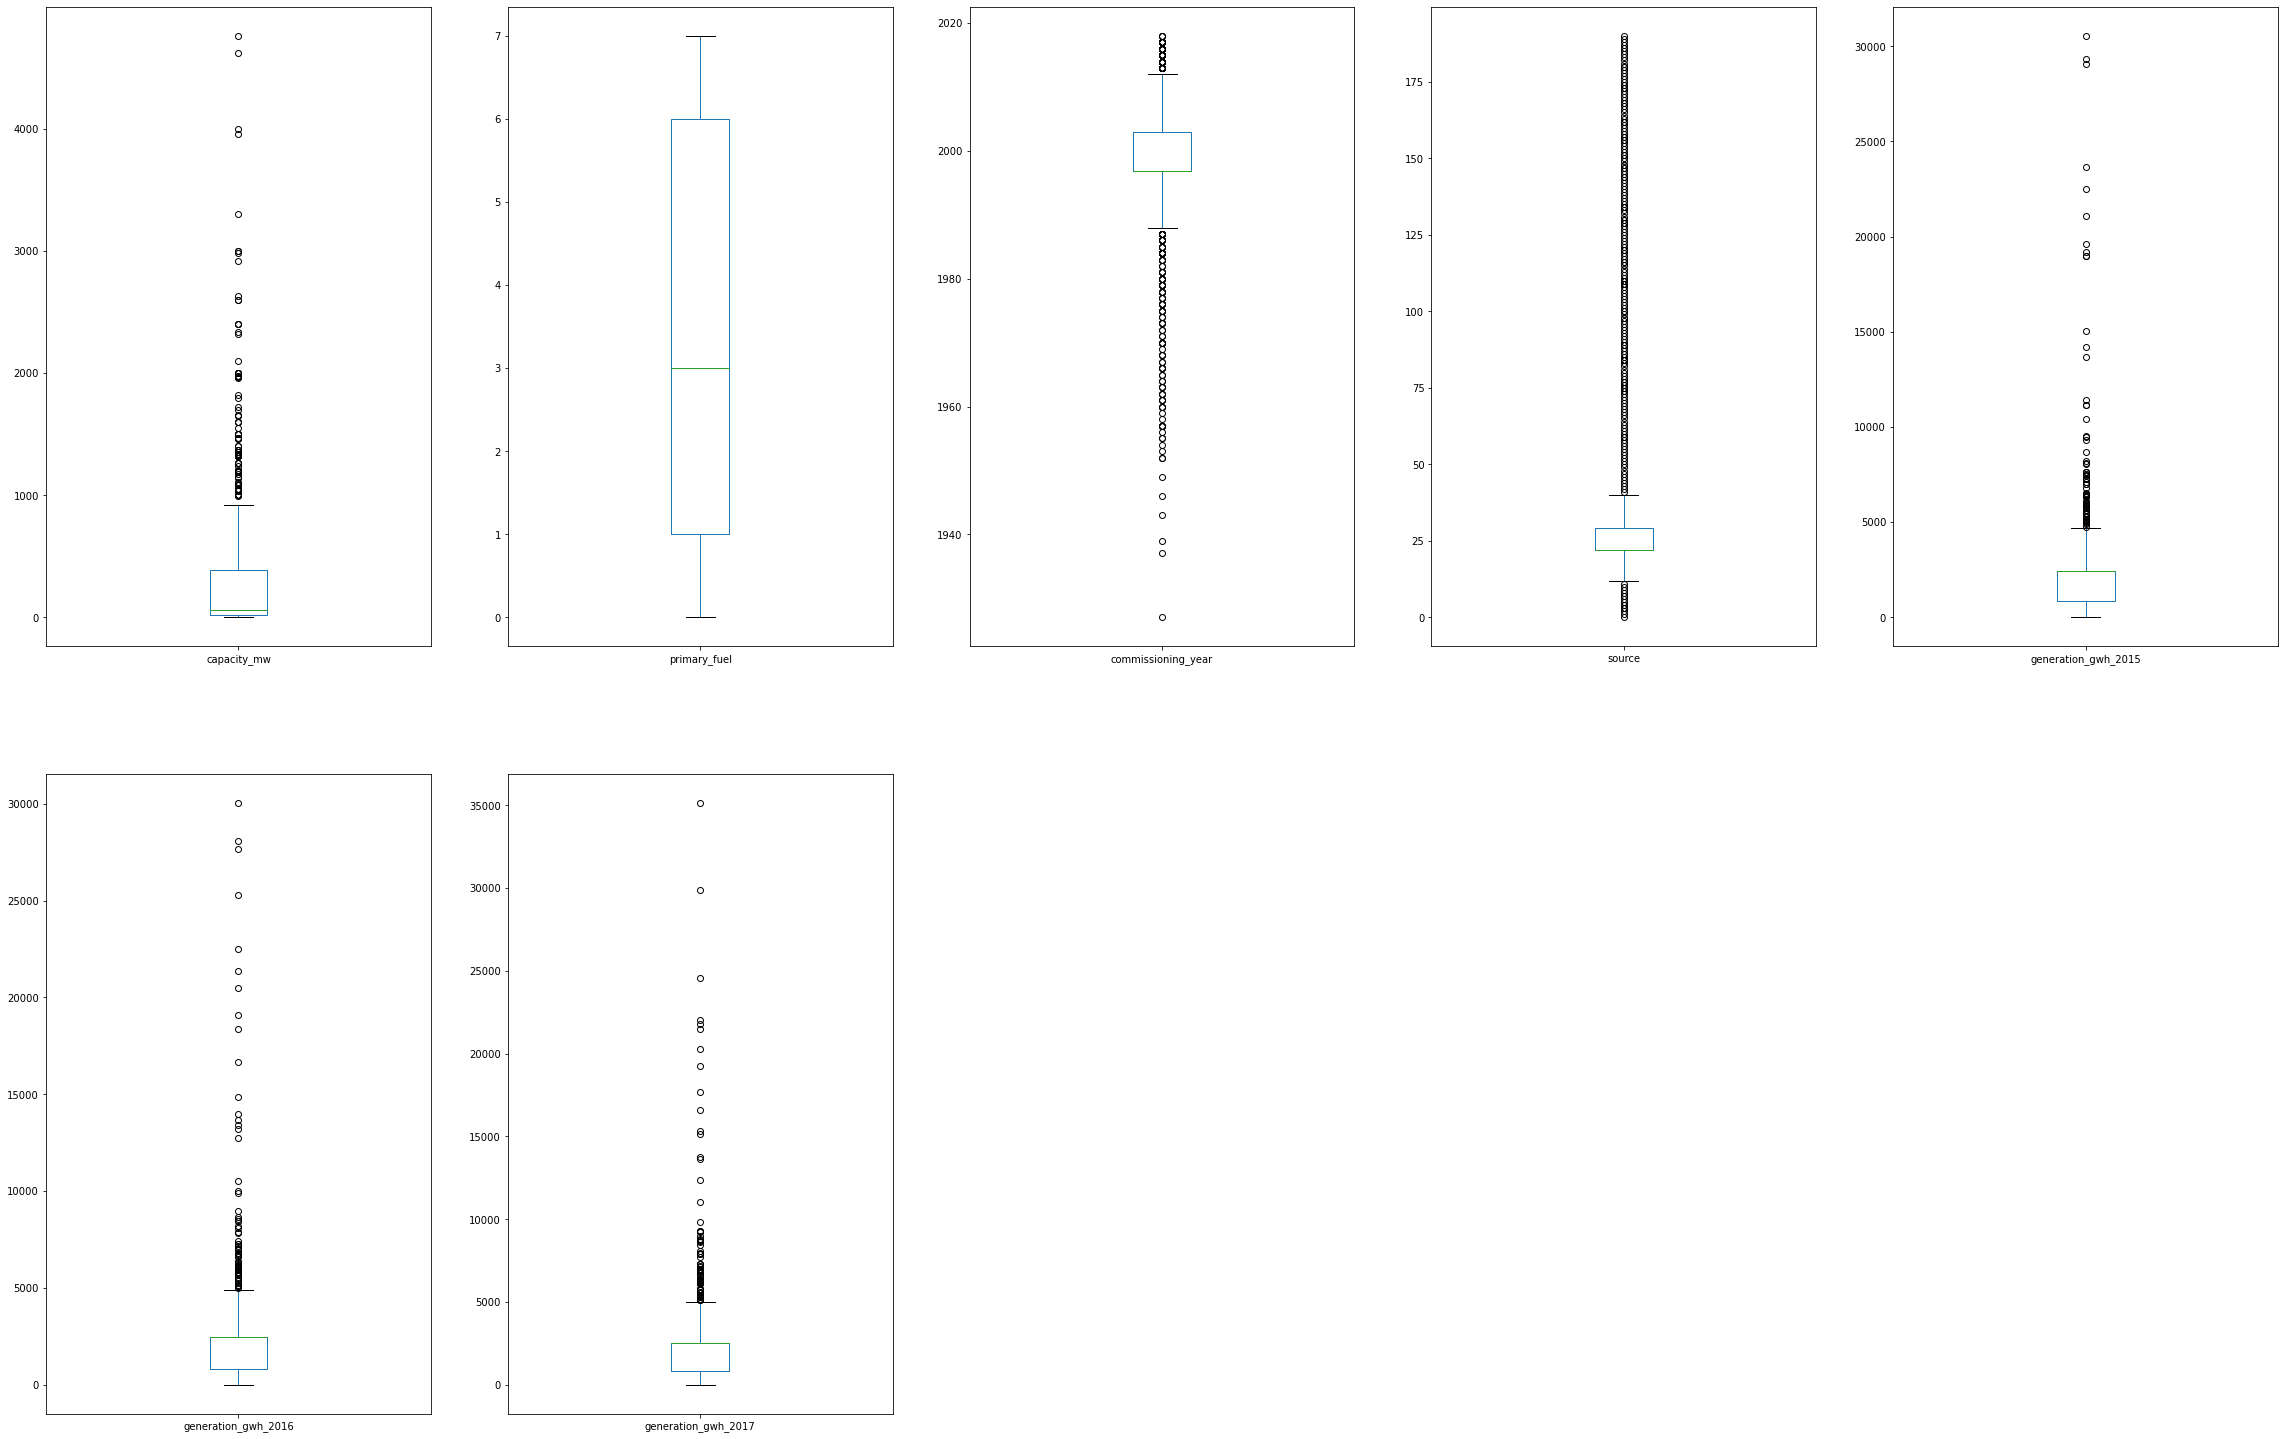

In [509]:
d.plot(kind="box",subplots=True,layout=(3,5),figsize=(40,40))

# checking outliers

In [510]:
import numpy as np
import scipy
from scipy.stats import zscore
z=np.abs(zscore(d))
z

array([[5.49310543e-01, 1.22541756e+00, 1.08742434e+00, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [3.84627594e-01, 9.67485760e-01, 1.75068904e-14, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [4.86024006e-01, 1.66399822e+00, 1.75068904e-14, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       ...,
       [5.09648681e-01, 1.66399822e+00, 1.75068904e-14, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [4.15667312e-01, 9.67485760e-01, 1.75068904e-14, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16],
       [5.25168540e-01, 1.66399822e+00, 1.75068904e-14, ...,
        0.00000000e+00, 1.58055100e-16, 1.55659091e-16]])

In [511]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  72,  81, 144, 144, 144, 144, 192, 210, 210,
       210, 210, 222, 300, 309, 309, 309, 309, 322, 343, 346, 364, 365,
       365, 365, 365, 372, 376, 445, 455, 479, 483, 485, 494, 494, 494,
       494, 495, 495, 495, 495, 539, 542, 575, 584, 602, 622, 649, 649,
       649, 649, 658, 658, 658, 658, 662, 670, 690, 696, 696, 696, 696,
       707, 710, 722, 722, 725, 725, 725, 727, 727, 727, 727, 729, 787,
       787, 787, 787, 789, 808, 809, 809, 809, 809, 833, 849, 871, 872,
       880, 881, 881, 881, 881, 896, 901], dtype=int64), array([0, 4, 5, 6, 3, 3, 0, 4, 5, 6, 3, 0, 4, 5, 6, 2, 3, 0, 4, 5, 6, 3,
       2, 3, 0, 0, 4, 5, 6, 2, 0, 2, 2, 2, 0, 2, 0, 4, 5, 6, 0, 4, 5, 6,
       2, 2, 2, 2, 2, 2, 0, 4, 5, 6, 0, 4, 5, 6, 3, 3, 3, 0, 4, 5, 6, 2,
       2, 4, 5, 4, 5, 6, 0, 4, 5, 6, 2, 0, 4, 5, 6, 0, 2, 0, 4, 5, 6, 3,
       2, 3, 3, 3, 0, 4, 5, 6, 3, 3], dtype=int64))


In [512]:
d2=d[(z<3).all(axis=1)]
d2

,capacity_mw,primary_fuel,commissioning_year,source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6.0,2011.000000,109.0,2414.072373,2453.936292,2531.754458
1,98.0,1.0,1996.876894,174.0,2414.072373,2453.936292,2531.754458
2,39.2,7.0,1996.876894,21.0,2414.072373,2453.936292,2531.754458
3,135.0,2.0,2004.000000,22.0,843.747000,886.004428,663.774500
4,1800.0,1.0,2015.000000,22.0,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...
903,1600.0,1.0,2016.000000,22.0,0.994875,233.596650,865.400000
904,3.0,6.0,1996.876894,77.0,2414.072373,2453.936292,2531.754458
905,25.5,7.0,1996.876894,21.0,2414.072373,2453.936292,2531.754458
906,80.0,1.0,1996.876894,59.0,2414.072373,2453.936292,2531.754458


In [513]:
d.shape

(908, 7)

In [514]:
d2.shape

(855, 7)

# dividing data in features and vectors-

In [515]:
#for finding the primary fuel
x=d2.drop(["primary_fuel"],axis=1)
y=d2["primary_fuel"]

# skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

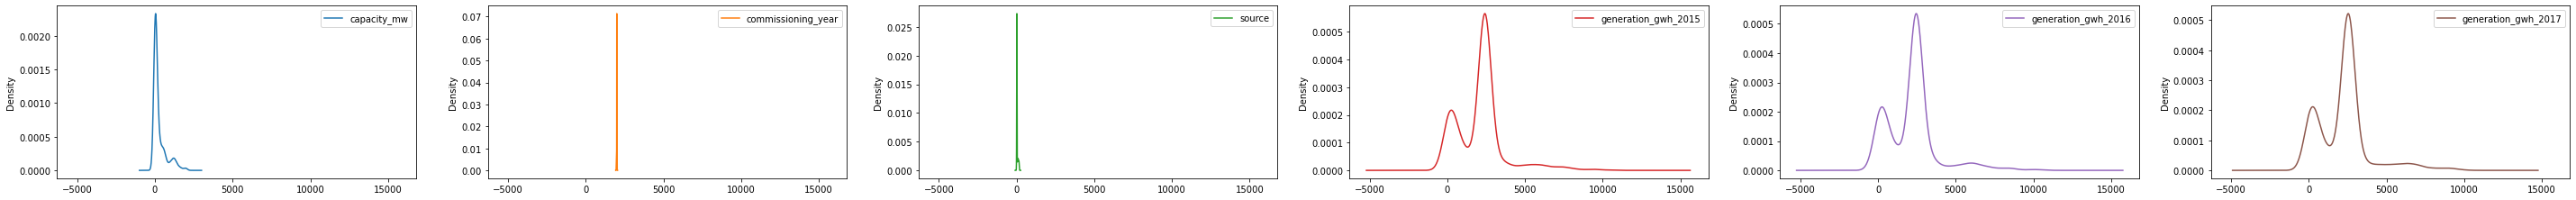

In [516]:
x.plot(kind="kde",subplots=True,layout=(12,6),figsize=(50,50))

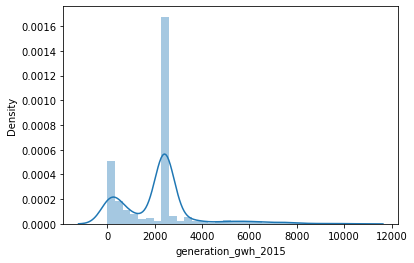

In [517]:
sns.distplot(d2.generation_gwh_2015)
plt.show()

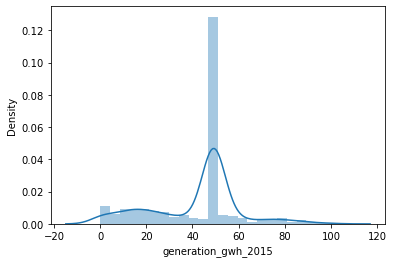

In [518]:
d2["generation_gwh_2015"]=np.sqrt(d2.generation_gwh_2015)
sns.distplot(d2['generation_gwh_2015'])
plt.show()

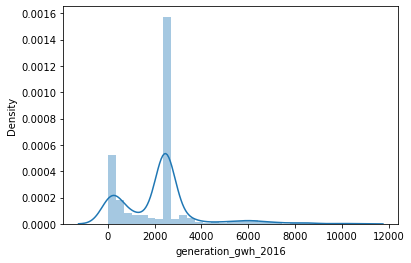

In [519]:
sns.distplot(d2.generation_gwh_2016)
plt.show()

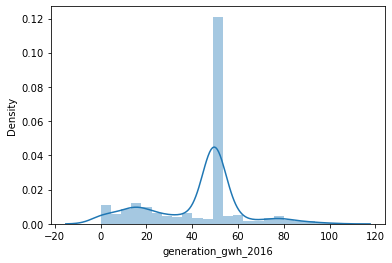

In [520]:
d2["generation_gwh_2016"]=np.sqrt(d2.generation_gwh_2016)
sns.distplot(d2['generation_gwh_2016'])
plt.show()

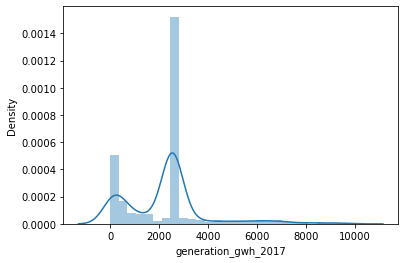

In [521]:
sns.distplot(d2.generation_gwh_2017)
plt.show()

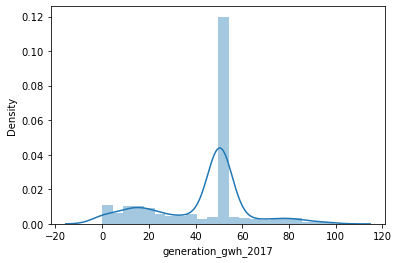

In [522]:
d2["generation_gwh_2017"]=np.sqrt(d2.generation_gwh_2017)
sns.distplot(d2['generation_gwh_2017'])
plt.show()

# Testing on various models

In [523]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)


In [524]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
mnb=MultinomialNB()
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
svc=SVC()

In [525]:
model=[lg,dtc,mnb,svc]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of",m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is
0.5653710247349824
[[ 0  0  0  0  0  0  8  5]
 [ 0 46  1 13  2  0 11  8]
 [ 0  5  1 11  0  0  1  1]
 [ 0  5  0 55  0  0  0 26]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  2  2]
 [ 0  2  0  0  0  0 21 13]
 [ 0  0  0  3  0  0  0 37]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        13
         1.0       0.75      0.57      0.65        81
         2.0       0.50      0.05      0.10        19
         3.0       0.66      0.64      0.65        86
         4.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         5
         6.0       0.49      0.58      0.53        36
         7.0       0.40      0.93      0.56        40

    accuracy                           0.57       283
   macro avg       0.35      0.35      0.31       283
weighted avg       0.57      0.57      0.54       283



Accuracy score of DecisionTreeClassifier() is
0.6925795053003534
[[ 5

In [526]:
#predicting the value
pred=dtc.predict(x_test)
print("primary_fuel",pred)

primary_fuel [3. 6. 3. 4. 7. 1. 1. 7. 1. 3. 7. 6. 3. 3. 1. 3. 5. 6. 1. 5. 6. 2. 1. 3.
 7. 1. 3. 3. 3. 6. 1. 3. 3. 0. 7. 1. 3. 1. 3. 3. 2. 2. 1. 7. 3. 7. 1. 3.
 1. 7. 6. 3. 7. 1. 7. 3. 1. 3. 6. 7. 6. 6. 2. 1. 1. 2. 1. 1. 1. 6. 2. 6.
 3. 2. 3. 3. 3. 6. 0. 1. 3. 6. 2. 0. 7. 6. 6. 1. 3. 3. 1. 7. 3. 3. 1. 3.
 1. 3. 7. 6. 6. 2. 5. 3. 1. 1. 3. 6. 6. 1. 3. 3. 7. 5. 3. 1. 1. 7. 6. 6.
 3. 3. 3. 0. 1. 2. 3. 3. 3. 6. 1. 5. 3. 7. 3. 3. 3. 3. 1. 1. 1. 4. 2. 1.
 3. 2. 7. 6. 3. 1. 3. 3. 6. 6. 7. 1. 1. 1. 5. 6. 1. 2. 1. 3. 3. 1. 2. 7.
 3. 3. 1. 7. 1. 6. 1. 3. 6. 7. 1. 3. 3. 1. 3. 7. 1. 3. 3. 3. 2. 2. 2. 3.
 1. 3. 3. 7. 7. 1. 3. 1. 6. 3. 3. 3. 0. 5. 3. 3. 3. 7. 7. 2. 7. 6. 2. 3.
 3. 7. 3. 7. 1. 3. 6. 3. 3. 1. 6. 2. 7. 3. 1. 3. 7. 3. 3. 3. 1. 3. 1. 2.
 5. 3. 3. 1. 1. 6. 1. 3. 7. 1. 1. 6. 1. 1. 1. 1. 7. 3. 6. 2. 7. 0. 1. 1.
 3. 1. 1. 0. 6. 1. 7. 3. 7. 3. 7. 3. 2. 5. 3. 3. 1. 7. 1.]


In [527]:
dfr1=pd.DataFrame({"Actual primary_fuel":y_test,"Predicted primary_fuel":pred})
dfr1

,Actual primary_fuel,Predicted primary_fuel
67,3.0,3.0
451,0.0,6.0
203,3.0,3.0
218,2.0,4.0
839,7.0,7.0
...,...,...
705,3.0,3.0
862,2.0,3.0
42,3.0,1.0
553,7.0,7.0


In [528]:
import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [529]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,pred))
print("mean_squared_error:",metrics.mean_squared_error(y_test,pred))
print("mean_squared_error:",metrics.mean_squared_error(y_test,pred))
print("Root mean_squared_error:",math.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 0.7102473498233216
mean_squared_error: 2.4134275618374557
mean_squared_error: 2.4134275618374557
Root mean_squared_error: 1.5535210207259686


# dividing data in features and vectors-

In [530]:
#for finding capacity_mw
x=d2.drop(["capacity_mw"],axis=1)
y=d2["capacity_mw"]

In [531]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,r2_score
lm=LinearRegression()
dtc=DecisionTreeRegressor()
KN=KNeighborsRegressor()
svr=SVR()

In [532]:
model=[lm,dtc,KN,svr]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    print(r2_score(predm,y_test))

-2.4762094822654315
0.5428766790702744
0.2307618243493461
-0.7160188844373978


In [533]:
#predicting the value
pred=dtc.predict(x_test)
print("capacity",pred)

capacity [3. 6. 3. 1. 7. 1. 1. 7. 1. 3. 7. 6. 0. 2. 1. 0. 5. 6. 1. 5. 6. 2. 1. 3.
 7. 1. 3. 3. 1. 6. 1. 1. 3. 0. 7. 1. 3. 1. 3. 1. 1. 2. 1. 7. 3. 7. 1. 3.
 1. 7. 6. 3. 7. 1. 7. 2. 1. 3. 6. 7. 6. 6. 3. 1. 0. 2. 1. 1. 1. 6. 2. 6.
 2. 2. 3. 3. 3. 6. 0. 2. 3. 6. 3. 0. 7. 6. 6. 1. 1. 3. 3. 7. 3. 2. 1. 1.
 1. 3. 7. 6. 6. 1. 5. 3. 0. 1. 2. 6. 6. 1. 3. 3. 7. 5. 3. 1. 1. 7. 6. 6.
 3. 3. 0. 0. 2. 1. 3. 3. 5. 2. 1. 6. 3. 7. 3. 3. 3. 3. 3. 1. 1. 1. 2. 1.
 2. 3. 7. 6. 5. 1. 3. 3. 6. 6. 7. 1. 1. 1. 5. 6. 1. 2. 2. 3. 1. 1. 1. 7.
 2. 3. 1. 7. 1. 6. 6. 3. 6. 7. 1. 3. 3. 1. 3. 7. 1. 3. 3. 1. 2. 2. 2. 3.
 1. 3. 2. 7. 7. 3. 3. 3. 1. 2. 1. 1. 0. 4. 3. 3. 3. 7. 7. 1. 7. 0. 2. 3.
 3. 7. 3. 7. 6. 2. 1. 3. 3. 1. 0. 3. 7. 2. 3. 3. 7. 3. 3. 3. 1. 3. 1. 2.
 5. 3. 2. 1. 3. 6. 1. 3. 7. 1. 1. 6. 1. 1. 3. 1. 7. 3. 6. 2. 7. 0. 1. 6.
 3. 1. 1. 1. 6. 1. 7. 3. 7. 3. 7. 3. 2. 5. 0. 2. 3. 7. 1.]


In [534]:
dfr=pd.DataFrame({"Actual capacity":y_test,"Predicted capacity":pred})
dfr

,Actual capacity,Predicted capacity
67,3.0,3.0
451,0.0,6.0
203,3.0,3.0
218,2.0,1.0
839,7.0,7.0
...,...,...
705,3.0,0.0
862,2.0,2.0
42,3.0,3.0
553,7.0,7.0


In [535]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,pred))
print("mean_squared_error:",metrics.mean_squared_error(y_test,pred))
print("mean_squared_error:",metrics.mean_squared_error(y_test,pred))
print("Root mean_squared_error:",math.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 0.6996466431095406
mean_squared_error: 2.303886925795053
mean_squared_error: 2.303886925795053
Root mean_squared_error: 1.5178560293371215
